Ethan Safra

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import quad

G = 6.6743e-11 # m^3/kg/s^2
M_E = 5.972e24 # kg
M_M = 7.35e22 # kg
R_E = 6.3781e6 # m
R_M = 1.7381e6 # m
g_0 = -G*M_E/R_E**2 # m/s^2
Omega = 7.272e-5 # rad/s

"""
Right-handed coordinate system
x goes East
y goes up
z goes North
origin at top center of mine
""";

# Part 1: The Ideal Case

In [2]:
# Question 1

def t(delta_y, a):
    return np.sqrt(2*delta_y/a)

h = -4e3 # m
Q1 = t(h, g_0)
print(f"t = {t(h, g_0)} s")

t = 28.57416552900485 s


In [3]:
# Question 2

def derivatives(t,s):
    y, v = s
    D = np.zeros(len(s))
    D[0] = s[1]
    D[1] = g_0
    return D

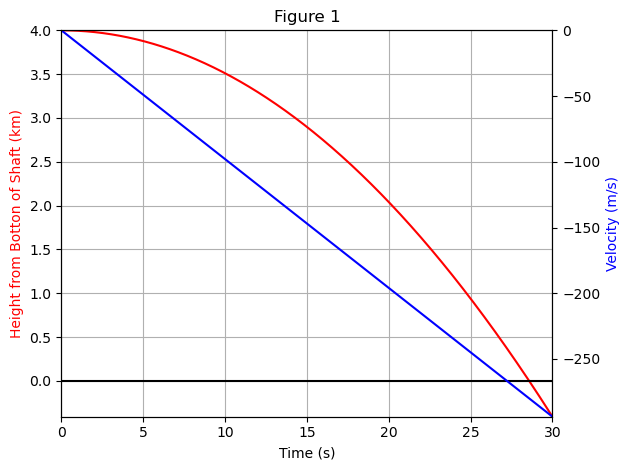

In [4]:
# Question 3

t0, tf = 0, 30
t_eval = np.linspace(t0, tf, 1001)

soln = solve_ivp(fun=derivatives, t_span=(t0,tf), y0=[0,0], t_eval=t_eval)
t = soln.t
y = soln.y[0] + 4000
v = soln.y[1]

fig, ax0 = plt.subplots()
ax0.plot(t, y/1000, color='r')
plt.grid()
plt.hlines(0, t0, tf, color='black')
ax1 = ax0.twinx()
ax1.plot(t, v, color='blue')

plt.title("Figure 1")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height from Botton of Shaft (km)", color='red')
ax1.set_ylabel("Velocity (m/s)", color='blue')
ax0.set_xlim(t0,tf)
ax0.set_ylim(np.min(y)/1000, np.max(y)/1000)
ax1.set_ylim(np.min(v), 0)
plt.tight_layout()
#plt.savefig("Lab 2 Figure 1")

In [5]:
def bottom(t,s):
    return s[0] + 4000

soln = solve_ivp(fun=derivatives, t_span=(t0,tf), y0=[0,0], t_eval=t_eval, events=bottom)
t_bottom = soln.t_events[0][0]
print(f"t = {t_bottom} s")
a = """
This time calculation is almost exactly the same as the calculation made in Question 1. Analytically, one would expect
the same result for both calculations. There is a slight difference, however, due to computer rounding errors.
"""
print(a)

t = 28.574165529004848 s

This time calculation is almost exactly the same as the calculation made in Question 1. Analytically, one would expect
the same result for both calculations. There is a slight difference, however, due to computer rounding errors.



# Part 2: Including Drag and a Variable $g$

t = 28.575659086738423 s


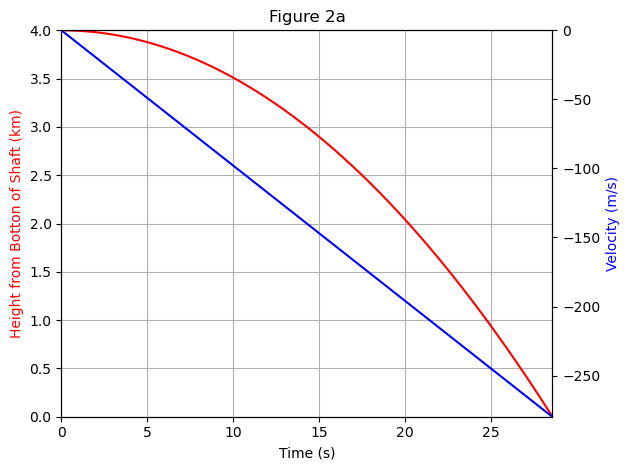

In [6]:
# Question 1

def derivatives(t,s):
    y, v = s
    D = np.zeros(len(s))
    g = g_0*(R_E+y)/R_E
    D[0] = v
    D[1] = g + alpha*np.abs(v)**gamma
    return D

def bottom(t,s):
    return s[0] + 4000
bottom.terminal = True

alpha = 0
gamma = 2 # doesn't matter
t0, tf = 0, 30
t_eval = np.linspace(t0, tf, 1001)

soln = solve_ivp(fun=derivatives, t_span=(t0,tf), y0=[0,0], t_eval=t_eval, events=bottom)
t = soln.t
y = soln.y[0] + 4000
v = soln.y[1]
t_bottom = soln.t_events[0][0]
print(f"t = {t_bottom} s")

fig, ax0 = plt.subplots()
ax0.plot(t, y/1000, color='r')
plt.grid()
ax1 = ax0.twinx()
ax1.plot(t, v, color='blue')

plt.title("Figure 2a")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height from Botton of Shaft (km)", color='red')
ax1.set_ylabel("Velocity (m/s)", color='blue')
ax0.set_xlim(t0, t_bottom)
ax0.set_ylim(0, 4)
ax1.set_ylim(np.min(v), 0)
plt.tight_layout()
#plt.savefig("Lab 2 Figure 2a")

In [7]:
# Question 2

a = """
Taking gravity to be height-dependent means the average gravity will be less than the gravity at the Earth's surface. I
initially assumed that gravity is constant, but in reality, gravity decreases as the height decreases. Thus, the
average gravity here is less than that of the original calculation. Therefore, the object is accelerating at a rate
slower than initially assumed, meaning the fall time is longer.
"""
print(a)


Taking gravity to be height-dependent means the average gravity will be less than the gravity at the Earth's surface. I
initially assumed that gravity is constant, but in reality, gravity decreases as the height decreases. Thus, the
average gravity here is less than that of the original calculation. Therefore, the object is accelerating at a rate
slower than initially assumed, meaning the fall time is longer.



t = 84.32902983016538 s

Accounting for drag significantly increases fall time. The drag force decreases the absolute value of the average
acceleration. The average velocity is also, in turn, slower. Thus, it takes more time for the mass to hit the bottom of
the shaft, and the fall time is greater.



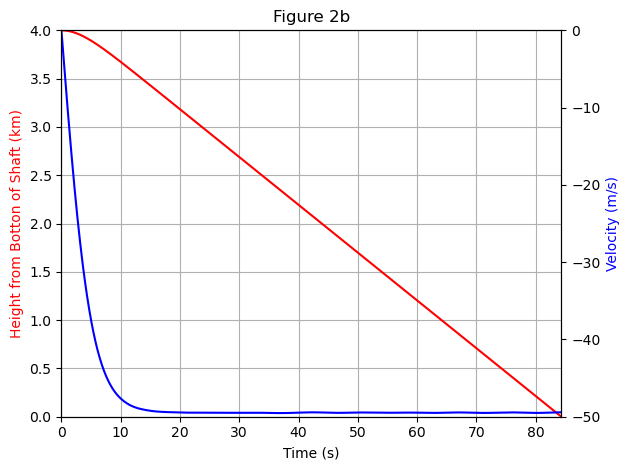

In [8]:
# Question 3

alpha = 4e-3
gamma = 2
t0, tf = 0, 90
t_eval = np.linspace(t0, tf, 1001)

soln = solve_ivp(fun=derivatives, t_span=(t0,tf), y0=[0,0], t_eval=t_eval, events=bottom)
t = soln.t
y = soln.y[0] + 4000
v = soln.y[1]
t_bottom = soln.t_events[0][0]
print(f"t = {t_bottom} s")

fig, ax0 = plt.subplots()
ax0.plot(t, y/1000, color='r')
plt.grid()
ax1 = ax0.twinx()
ax1.plot(t, v, color='blue')

plt.title("Figure 2b")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height from Botton of Shaft (km)", color='red')
ax1.set_ylabel("Velocity (m/s)", color='blue')
ax0.set_xlim(t0, t_bottom)
ax0.set_ylim(0, 4)
ax1.set_ylim(-50, 0)
plt.tight_layout()
#plt.savefig("Lab 2 Figure 2b")

a = """
Accounting for drag significantly increases fall time. The drag force decreases the absolute value of the average
acceleration. The average velocity is also, in turn, slower. Thus, it takes more time for the mass to hit the bottom of
the shaft, and the fall time is greater.
"""
print(a)

# Part 3: The Coriolis Force

In [9]:
# Question 1

def derivatives(t,s):
    x, y, vx, vy = s
    D = np.zeros(len(s))
    g = g_0*(R_E+y)/R_E
    D[0] = vx
    D[1] = vy
    D[2] = -2*Omega*vy - alpha*np.abs(vx)**gamma # ax
    D[3] = g + alpha*np.abs(vy)**gamma + 2*Omega*vx # ay
    return D

To ensure the mass does not hit the wall when dropped from the center, the mine must be at least
11.083261364756552 m in diameter.


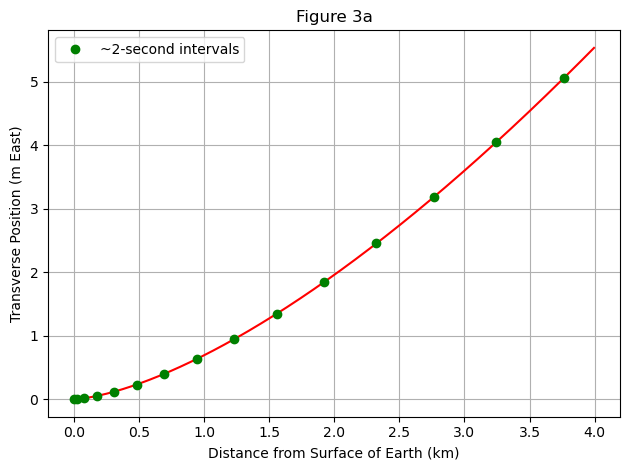

In [10]:
# Questions 2 & 3

def bottom(t,s):
    return s[1] + 4000
bottom.terminal = True

alpha = 0
gamma = 2 # doesn't matter
t0, tf = 0, 30
t_eval = np.linspace(t0, tf, 1001)

soln = solve_ivp(fun=derivatives, t_span=(t0,tf), y0=[0,0,0,0], t_eval=t_eval, events=bottom)
t = soln.t
x = soln.y[0]
y = soln.y[1]
vx = soln.y[2]
vy = soln.y[3]

x_dots = x[::1001//15]
y_dots = y[::1001//15]
min_radius = soln.y_events[0][0][0]
print(f"To ensure the mass does not hit the wall when dropped from the center, the mine must be at least\n{2*min_radius} m in diameter.")

fig,ax = plt.subplots()
ax.plot(-y/1000, x, color='red')
ax.plot(-y_dots/1000, x_dots, 'o', color='green', label="~2-second intervals")

ax.set_title("Figure 3a")
ax.set_xlabel("Distance from Surface of Earth (km)")
ax.set_ylabel("Transverse Position (m East)")
plt.grid()
plt.legend()
plt.tight_layout()
#plt.savefig("Lab 2 Figure 3a")

t = 84.32807154908616 s (Difference from Part 2 calculation is negligable.) 

To ensure the mass does not hit the wall when dropped from the center, the mine must be at least
45.68167553194336 m in diameter.
If dropped from the center of a 5 m-wide mine, the mass will hit the wall after 29.732961206504832 s at a depth of
1298.309214657406 m.

Accounting for drag significantly affects the transverse position as a function of depth. Accounting for drag means
that the vertical velocity is slower. This difference in the vertical velocity calculations is greater than that of the
horizontal velocity. Thus, the Coriolis force affects the mass for a longer period of time. This means the mass's
horizontal displacement is greater when taking drag into account.



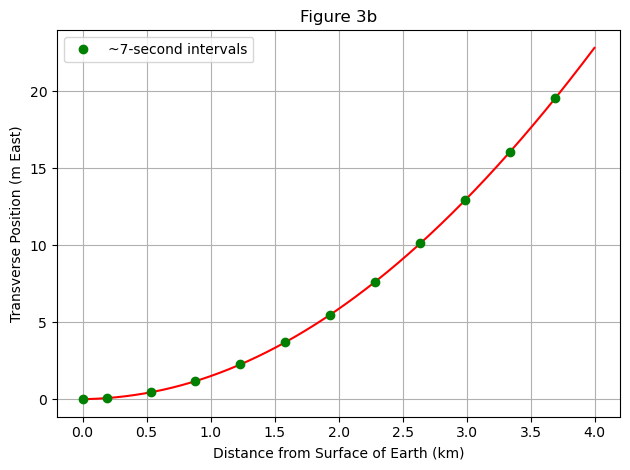

In [11]:
# Question 4

def wall(t,s):
    return s[0] - 2.5

alpha = 4e-3
gamma = 2
t0, tf = 0, 100
t_eval = np.linspace(t0, tf, 1001)

soln = solve_ivp(fun=derivatives, t_span=(t0,tf), y0=[0,0,0,0], t_eval=t_eval, events=(wall, bottom))
t = soln.t
x = soln.y[0]
y = soln.y[1]
vx = soln.y[2]
vy = soln.y[3]

x_dots = x[::1001//14]
y_dots = y[::1001//14]
t_bottom = soln.t_events[1][0]
print(f"t = {t_bottom} s (Difference from Part 2 calculation is negligable.) \n")
min_radius = soln.y_events[1][0][0]
print(f"To ensure the mass does not hit the wall when dropped from the center, the mine must be at least\n{2*min_radius} m in diameter.")
t_wall = soln.t_events[0][0]
y_wall = -soln.y_events[0][0][1]
print(f"If dropped from the center of a 5 m-wide mine, the mass will hit the wall after {t_wall} s at a depth of\n{y_wall} m.")

fig,ax = plt.subplots()
ax.plot(-y/1000, x, color='red')
ax.plot(-y_dots/1000, x_dots, 'o', color='green', label="~7-second intervals")

ax.set_title("Figure 3b")
ax.set_xlabel("Distance from Surface of Earth (km)")
ax.set_ylabel("Transverse Position (m East)")
plt.grid()
plt.legend()
plt.tight_layout()
#plt.savefig("Lab 2 Figure 3b")

a = """
Accounting for drag significantly affects the transverse position as a function of depth. Accounting for drag means
that the vertical velocity is slower. This difference in the vertical velocity calculations is greater than that of the
horizontal velocity. Thus, the Coriolis force affects the mass for a longer period of time. This means the mass's
horizontal displacement is greater when taking drag into account.
"""
print(a)

# Part 4: An Infinitely Deep ine


If the mass were dropped through an infinitely deep mine with no drag force and no Coriolis Force, the mass would
sinusoidally travel back and forth from pole to pole. The mass would reach its maximum velocity at the center of the
Earth; it is at this point that the gravity and acceleration reach zero and then start going the other direction. The
mass reaches zero velocity and starts traveling the other direction once it reaches the other end of the Earth.
Assuming no forces aside from Earth's gravitational force ever act on the mass, this cycle will continue endlessly.

The mass first passes the center of the Earth after 1267.2282288730867 s at 7905.676404484293 m/s.
The mass first reaches the other side of the Earth after 2534.12665345472 s.


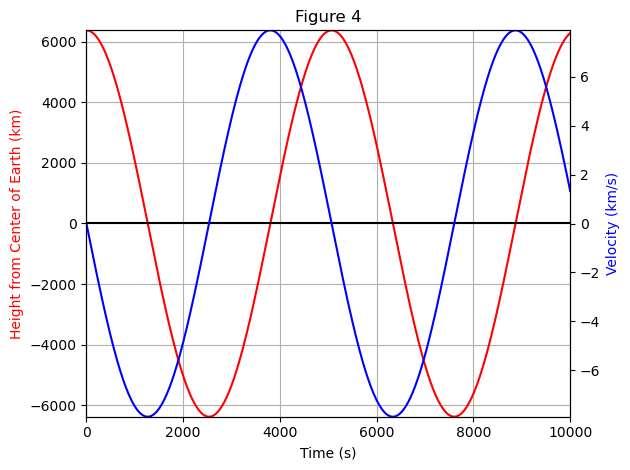

In [12]:
# Questions 1 & 2

def derivatives(t,s):
    y, v = s
    D = np.zeros(len(s))
    if R_E > np.abs(y):
        g = g_0*np.abs(R_E+y)/R_E
    else:
        g = -g_0*np.abs(R_E+y)/R_E
    D[0] = v
    D[1] = g
    return D

def center_E(t,s):
    return s[0] + R_E

def other_side(t,s):
    return s[1]

t0, tf = 0, 10000
t_eval = np.linspace(t0, tf, 1001)

soln = solve_ivp(fun=derivatives, t_span=(t0,tf), y0=[0,0], t_eval=t_eval, events=(center_E,other_side))
t = soln.t
y = soln.y[0] + R_E
v = soln.y[1]

fig, ax0 = plt.subplots()
ax0.plot(t, y/1000, color='r')
plt.grid()
plt.hlines(0, t0,tf, color='black')
ax1 = ax0.twinx()
ax1.plot(t, v/1000, color='blue')

plt.title("Figure 4")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height from Center of Earth (km)", color='red')
ax1.set_ylabel("Velocity (km/s)", color='blue')
ax0.set_xlim(t0,tf)
ax0.set_ylim(np.min(y)/1000, np.max(y)/1000)
ax1.set_ylim(np.min(v)/1000, np.max(v)/1000)
plt.tight_layout()
#plt.savefig("Lab 2 Figure 4")

a = """
If the mass were dropped through an infinitely deep mine with no drag force and no Coriolis Force, the mass would
sinusoidally travel back and forth from pole to pole. The mass would reach its maximum velocity at the center of the
Earth; it is at this point that the gravity and acceleration reach zero and then start going the other direction. The
mass reaches zero velocity and starts traveling the other direction once it reaches the other end of the Earth.
Assuming no forces aside from Earth's gravitational force ever act on the mass, this cycle will continue endlessly.
"""
print(a)
t_center = soln.t_events[0][0]
v_center = np.abs(soln.y_events[0][0][1])
print(f"The mass first passes the center of the Earth after {t_center} s at {v_center} m/s.")
t_other_side = soln.t_events[1][1]
print(f"The mass first reaches the other side of the Earth after {t_other_side} s.")

In [13]:
# Question 3

def orbital_period(M, r):
    v = np.sqrt(G*M/r)
    T = 2*np.pi*r/v
    return T

surface_T = orbital_period(M_E, R_E)
print(f"The theoretical orbital period around the surface of the Earth is {surface_T} s. This  is {surface_T/t_other_side} times longer than the theoretical time it takes for a mass to pass through the Earth and reach the other side.")
a = """
The period for a theoretical orbit around the surface of the Earth is approximately equal to the period of the
sinusoids in Figure 4 since the mass is moving in simple harmonic motion in both situations.
"""
print(a)

The theoretical orbital period around the surface of the Earth is 5069.371199675785 s. This  is 2.0004411353176925 times longer than the theoretical time it takes for a mass to pass through the Earth and reach the other side.

The period for a theoretical orbit around the surface of the Earth is approximately equal to the period of the
sinusoids in Figure 4 since the mass is moving in simple harmonic motion in both situations.



# Part 5: A Non-Uniform Earth

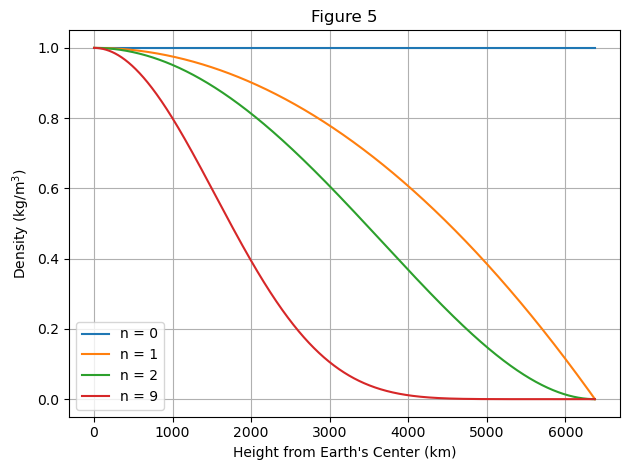

In [14]:
# Question 1

def rho(r):
    return rho_n*(1 - r**2/R_E**2)**n

rho_n = 1
r_vals = np.linspace(0, R_E, 1001)
n_vals = [0, 1, 2, 9]
rho_vals = np.zeros((len(n_vals), len(r_vals)))
for i in range(len(n_vals)):
    n = n_vals[i]
    rho_vals[i,:] = rho(r_vals)

fig,ax = plt.subplots()
for i in range(len(n_vals)):
    ax.plot(r_vals/1000, rho_vals[i], label=f"n = {n_vals[i]}")

plt.title("Figure 5")
ax.set_xlabel("Height from Earth's Center (km)")
ax.set_ylabel(r'Density (kg/m$^3$)')
plt.grid()
plt.legend()
plt.tight_layout()
#plt.savefig("Lab 2 Figure 5")

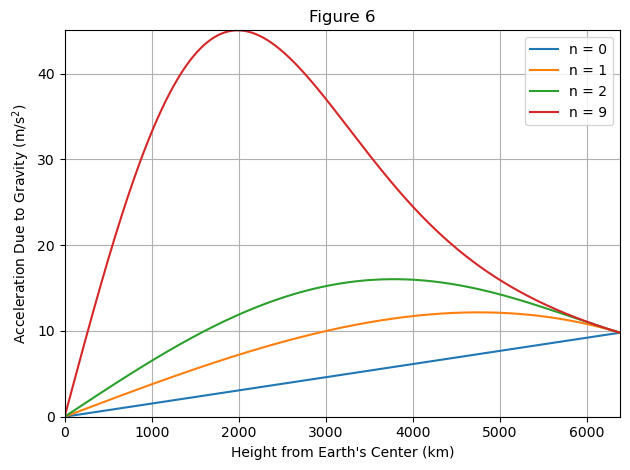

In [15]:
# Question 2

def integral(r):
    return (r**2)*(1 - r**2/R_E**2)**n

g_vals = np.zeros((len(n_vals), len(r_vals)))
for i in range(len(n_vals)):
    n = n_vals[i]
    I_R = quad(integral, 0, R_E)[0]
    rho_n = M_E/(4*np.pi*I_R)
    for j in range(len(r_vals)):
        r = r_vals[j]
        I_r = quad(integral, 0, r)[0]
        if np.isclose(r,0):
            g_vals[i][j] = 0
        else:
            g_vals[i][j] = 4*np.pi*G*rho_n*I_r/r**2

fig,ax = plt.subplots()
for i in range(len(n_vals)):
    ax.plot(r_vals/1000, g_vals[i], label=f"n = {n_vals[i]}")

plt.title("Figure 6")
ax.set_xlabel("Height from Earth's Center (km)")
ax.set_ylabel(r'Acceleration Due to Gravity (m/s$^2$)')
ax.set_xlim(0,R_E/1000)
ax.set_ylim(0,np.max(g_vals))
plt.grid()
plt.legend()
plt.tight_layout()
#plt.savefig("Lab 2 Figure 6")

For n=0, the mass first passes the center of the Earth after 1267.2282288731037 s at 7905.676404484555 m/s.
For n=1, the mass first passes the center of the Earth after 1096.5094366431474 s at 10462.05739911339 m/s.
For n=2, the mass first passes the center of the Earth after 1035.1519832753515 s at 12202.14544330877 m/s.
For n=9, the mass first passes the center of the Earth after 943.841512390153 s at 18393.453606815157 m/s.


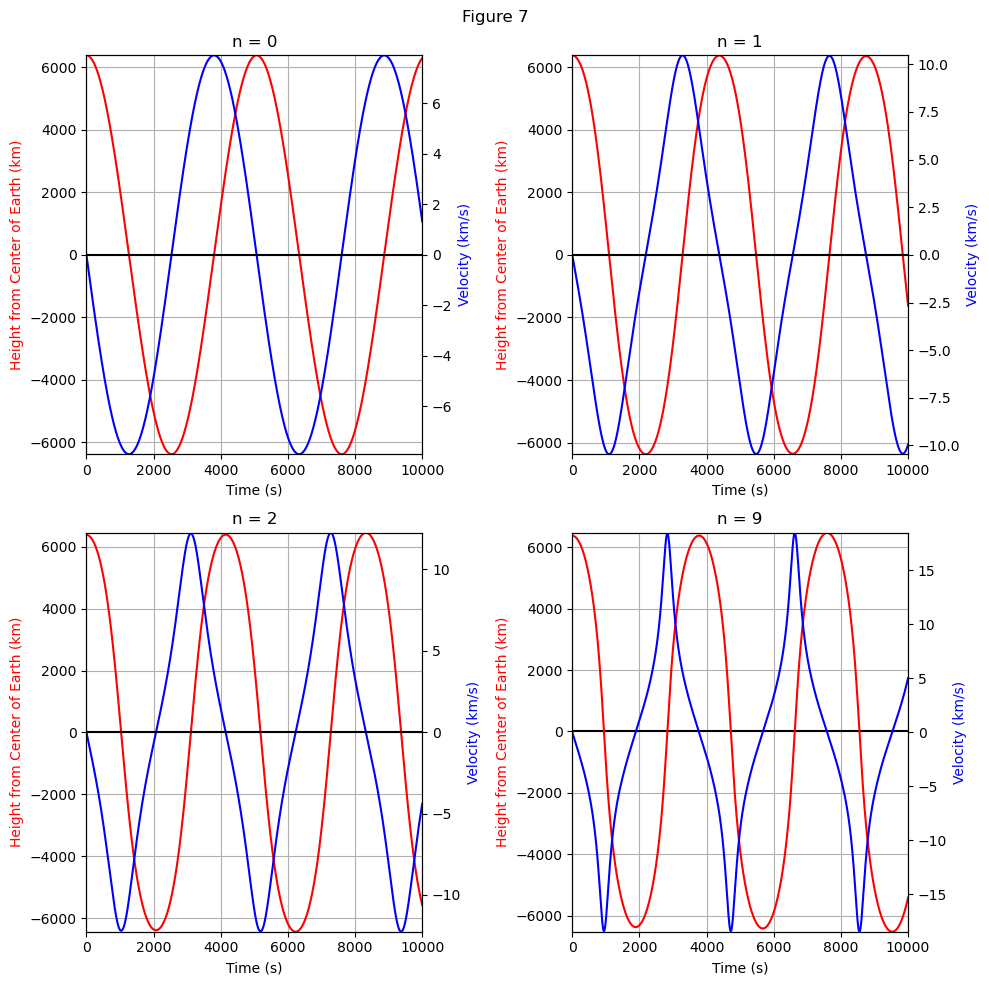

In [16]:
# Questions 3 & 4

def derivatives(t,s):
    y, v = s
    r = R_E + y
    D = np.zeros(len(s))
    D[0] = v
    I_r = quad(integral, 0, np.abs(r))[0]
    if r>0:
        g = -4*np.pi*G*rho_n*I_r/r**2
    else:
        g = 4*np.pi*G*rho_n*I_r/r**2
    D[1] = g
    return D

def center_E(t,s):
    return s[0] + R_E

alpha = 4e-3
gamma = 2
t0, tf = 0, 10000
t_eval = np.linspace(t0, tf, 1001)

fig, ((ax0y, ax1y), (ax2y, ax9y)) = plt.subplots(2,2, figsize=(10,10))
ax_y = [ax0y, ax1y, ax2y, ax9y]
fig.suptitle("Figure 7")

for i in range(len(n_vals)):
    n = n_vals[i]
    I_R = quad(integral, 0, R_E)[0]
    rho_n = M_E/(4*np.pi*I_R)
    
    soln = solve_ivp(fun=derivatives, t_span=(t0,tf), y0=[0,0], t_eval=t_eval, events=center_E)
    t = soln.t
    y = soln.y[0] + R_E
    v = soln.y[1]

    t_center = soln.t_events[0][0]
    v_center = np.abs(soln.y_events[0][0][1])
    print(f"For n={n}, the mass first passes the center of the Earth after {t_center} s at {v_center} m/s.")

    ax0 = ax_y[i]
    ax0.plot(t, y/1000, color='r')
    ax0.grid()
    plt.hlines(0, t0,tf, color='black')
    ax1 = ax0.twinx()
    ax1.plot(t, v/1000, color='blue')

    ax0.set_title(f"n = {n}")
    ax0.set_xlabel("Time (s)")
    ax0.set_ylabel("Height from Center of Earth (km)", color='red')
    ax1.set_ylabel("Velocity (km/s)", color='blue')
    ax0.set_xlim(t0,tf)
    ax0.set_ylim(np.min(y)/1000, np.max(y)/1000)
    ax1.set_ylim(np.min(v)/1000, np.max(v)/1000)

plt.tight_layout()
#plt.savefig("Lab 2 Figure 7")

## Part 6: A Lunar Mine Shaft

In [17]:
# Question 1

g_0M = -G*M_M/R_M**2 # m/s^2
def derivatives(t,s):
    y, v = s
    D = np.zeros(len(s))
    if R_M > np.abs(y):
        g = g_0M*np.abs(R_M+y)/R_E
    else:
        g = -g_0M*np.abs(R_M+y)/R_E
    D[0] = v
    D[1] = g
    return D

def center_E(t,s):
    return s[0] + R_M

def other_side(t,s):
    return s[1]

t0, tf = 0, 10000
t_eval = np.linspace(t0, tf, 1001)

soln = solve_ivp(fun=derivatives, t_span=(t0,tf), y0=[0,0], t_eval=t_eval, events=(center_E,other_side))
t_center = soln.t_events[0][0]
v_center = np.abs(soln.y_events[0][0][1])
t_other_side = soln.t_events[1][1]

print(f"The mass first passes the center of the Moon after {t_center} s at {v_center} m/s.")
print(f"The mass first reaches the other side of the Moon after {t_other_side} s.")

The mass first passes the center of the Moon after 3112.679986124235 s at 877.0669989053464 m/s.
The mass first reaches the other side of the Moon after 6225.222633275483 s.


In [18]:
# Question 2

density_M = M_M / (4/3*np.pi*R_M**3)
density_E = M_E / (4/3*np.pi*R_E**3)
print(f"The Moon has a density of {density_M} kg/m^3. The Earth is {density_E/density_M} times denser than the Moon.")

The Moon has a density of 3341.7538038703183 kg/m^3. The Earth is 1.6443064726034609 times denser than the Moon.


Question 3

From Newton's Law of Gravity, we know that
$$
g = \frac{G M}{r^2}
$$
If we assume a constant density, this means that
$$
g = \frac{G \rho V}{r^2}
$$
Thus, for a spherical body with constant density,
$$
g = \frac{4}{3} \pi r G \rho
$$

In Part 1, we assume
$$
t = \sqrt{\frac{2h}{g}}
$$
Using this and the above definition of $g$ yeilds
$$
t ∝ \sqrt{\frac{2h}{\frac{4}{3} \pi r G \rho}}
$$
Therefore, we should expect an inverse square root relationship between the fall time and the planetary object's density:
$$
T ∝ \frac{1}{\sqrt{ \rho }}
$$

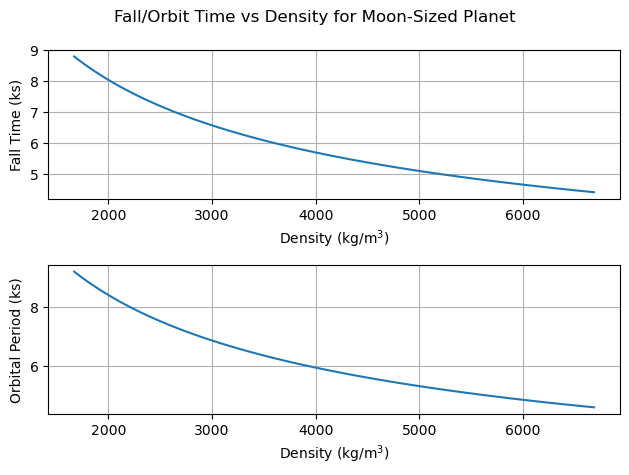

In [19]:
# Question 3

def orbital_period(M, r):
    v = np.sqrt(G*M/r)
    T = 2*np.pi*r/v
    return T

n_big = 101
M = np.linspace(0.5*M_M, 2*M_M, n_big)
fall_time = np.zeros(n_big)
orbit_time = np.zeros(n_big)

for i in range(n_big):
    g_0M = -G*M[i]/R_M**2 # m/s^2
    soln = solve_ivp(fun=derivatives, t_span=(t0,tf), y0=[0,0], t_eval=t_eval, events=other_side)
    fall_time[i] = soln.t_events[0][1]
    orbit_time[i] = orbital_period(M[i], R_M)

Vol_M = 4/3 * np.pi * R_M**3
fig,ax = plt.subplots(2,1)
ax[0].plot(M/Vol_M, fall_time/1000)
ax[1].plot(M/Vol_M, orbit_time/1000)

fig.suptitle("Fall/Orbit Time vs Density for Moon-Sized Planet")
ax[0].set_xlabel(r'Density (kg/m$^3$)')
ax[0].set_ylabel("Fall Time (ks)")
ax[0].grid()
ax[1].set_xlabel(r'Density (kg/m$^3$)')
ax[1].set_ylabel("Orbital Period (ks)")
ax[1].grid()
plt.tight_layout()